### Classify MNIST digits using CNN

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
import os

In [17]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


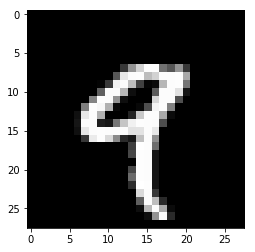

In [19]:
from matplotlib import pyplot
from scipy.misc import toimage
pyplot.imshow(toimage(x_train[4]))
pyplot.show()

In [20]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

In [21]:
x_train /= 255
x_test /= 255

In [22]:
n_class=10
y_train = keras.utils.to_categorical(y_train,n_class)
y_test = keras.utils.to_categorical(y_test,n_class)

In [23]:
n_conv = 64
k_conv = (3,3)


In [24]:
model = Sequential()
model.add(Conv2D(n_conv,k_conv, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(x_train,y_train,epochs=10,verbose=1, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1411 - acc: 0.9593 - val_loss: 0.0636 - val_acc: 0.9798
Epoch 2/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0493 - acc: 0.9855 - val_loss: 0.0457 - val_acc: 0.9844
Epoch 3/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0306 - acc: 0.9911 - val_loss: 0.0424 - val_acc: 0.9859
Epoch 4/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0200 - acc: 0.9943 - val_loss: 0.0445 - val_acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0128 - acc: 0.9964 - val_loss: 0.0457 - val_acc: 0.9856
Epoch 6/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0077 - acc: 0.9980 - val_loss: 0.0397 - val_acc: 0.9879
Epoch 7/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0055 - acc: 0.9988 - val_loss: 0.0474 - val_ac